<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/FE_Trabalho_Integrado_RM351578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Para podermos iniciar a analise do Dataset de Clientes devemos realizar a leitura da base de dados.

In [130]:
#Realizando o import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [131]:
#Agora vamos criar uma funcao para poder realizar o upload do arquivo no Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [3]:
#Como nao sabemos qual o enconde o arquivo foi gerado vamos investigar
import chardet
# Abre o arquivo em modo de leitura binária
with open('dataset.txt', 'rb') as arquivo:
    # Lê uma quantidade de bytes do arquivo para análise
    dados = arquivo.read()
    # Detecta o encoding dos dados
    resultado = chardet.detect(dados)

# Exibe o resultado
print("Encoding do arquivo:", resultado['encoding'])

Encoding do arquivo: ISO-8859-1


In [132]:
#Vamos agora ler os dados do arquivo importado com o encoding ISO-8859-1
df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)

<ipython-input-132-d55eb56d76ea>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)


In [133]:
#Vamos verificar uma amostra dos dados para identificar se a leitura foi realizada de forma correta
df_clientes.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


Neste ponto ja obtivemos acesso aos dados da nossa base de dados de clientes.
Ao visualizar um trecho das amostras ja identificamos o primeiro ponto a se tratar, as variaveis estao sem rotulos. Recebemos um segundo arquivo com o descritivo das variaveis. Agora vamos realizar o carregamento deste arquivo e setar os rotulos no nosso data frame de clientes.

In [134]:
#Lendo o arquivo de descritivo de rotulos das variaveis
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [135]:
#Criando o Dataframe com os rotulos
df_descritivo_rotulos_clientes = pd.read_excel('descritivo_características.xlsx')

In [136]:
#Vamos verificar os dados
df_descritivo_rotulos_clientes.head()

,Var_Id,Característica,Descrição
0,1,ID_CLIENTE,Número sequencial para o requerente (a ser usa...
1,2,TIPO_FUNCIONARIO,Não informado
2,3,DIA_PAGAMENTO,"Dia do mês para o pagamento da fatura, escolhi..."
3,4,TIPO_ENVIO_APLICACAO,Indica se a aplicação foi submetida via intern...
4,5,QUANT_CARTOES_ADICIONAIS,Quantidade de cartões adicionais solicitados n...


Apos avaliar os dados dos descritivos identificamos que o rotulo das nossas variaveis estao descritas na coluna Caracteristica do arquivo descritivo dos dados, vamos entao separala em um novo dataframe, realizar o pivot dos dados e realizar um append na primeira linha do nosso data frame de clientes.

In [137]:
#Separando apenas as colunas que identificam os rotulos
df_rotulos = df_descritivo_rotulos_clientes['Característica']
df_rotulos.head()

0                  ID_CLIENTE
1            TIPO_FUNCIONARIO
2               DIA_PAGAMENTO
3        TIPO_ENVIO_APLICACAO
4    QUANT_CARTOES_ADICIONAIS
Name: Característica, dtype: object

In [138]:
#Vamos agora transformar a coluna caracteristica nos rotulos das colunas
# porem primeiro vamos transformar os rotulos em um data frame
import pandas as pd
df_rotulos = pd.DataFrame(df_rotulos)
df_rotulos.head()

,Característica
0,ID_CLIENTE
1,TIPO_FUNCIONARIO
2,DIA_PAGAMENTO
3,TIPO_ENVIO_APLICACAO
4,QUANT_CARTOES_ADICIONAIS


In [139]:
#Pronto agora apenas vamos setar os rotulos das colunas no dataframe de clientes
df_clientes = df_clientes.rename(columns= df_rotulos['Característica'])
df_clientes.head()


,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


Agora temos nossos dados carregados e rotulados, vamos iniciar a analise das features

Vamos iniciar a analise pela nossa variavel alvo que nos informa se o cliente e bom ou mau pagador, na nossa base o rotulo e ROTULO_ALVO_MAU=1 sendo o valor 1 para mau pagador e 0 para bom pagador.
Primeiro vamos verificar se realmente tratase de uma feature binaria

<ipython-input-140-fbce98a5c1ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ROTULO_ALVO_MAU=1',data=df_clientes,palette='hls')


<Axes: xlabel='ROTULO_ALVO_MAU=1', ylabel='count'>

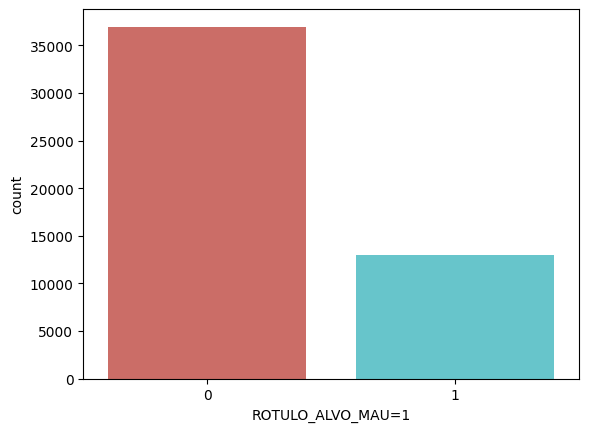

In [140]:
#Vamos plotar um contplot para verificar se a variavel e binaria e sua distribuicao
sns.countplot(x='ROTULO_ALVO_MAU=1',data=df_clientes,palette='hls')

Na sequencia vamos verificar a incidencia de nulos na nossa base

In [141]:
#Verificando os nan na base de clientes
df_clientes.isnull().sum()

ID_CLIENTE                               0
TIPO_FUNCIONARIO                         0
DIA_PAGAMENTO                            0
TIPO_ENVIO_APLICACAO                     0
QUANT_CARTOES_ADICIONAIS                 0
TIPO_ENDERECO_POSTAL                     0
SEXO                                     0
ESTADO_CIVIL                             0
QUANT_DEPENDENTES                        0
NIVEL_EDUCACIONAL                        0
ESTADO_NASCIMENTO                        0
CIDADE_NASCIMENTO                        0
NACIONALIDADE                            0
ESTADO_RESIDENCIAL                       0
CIDADE_RESIDENCIAL                       0
BAIRRO_RESIDENCIAL                       0
FLAG_TELEFONE_RESIDENCIAL                0
CODIGO_AREA_TELEFONE_RESIDENCIAL         0
TIPO_RESIDENCIA                       1349
MESES_RESIDENCIA                      3777
FLAG_TELEFONE_MOVEL                      0
FLAG_EMAIL                               0
RENDA_PESSOAL_MENSAL                     0
OUTRAS_REND

In [142]:
#Vamos tambem verificar o tipo das features da base
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

Vamos iniciar removendo todas as variaveis que consideramos nao sao relevantes para nosso modelo

In [143]:
#Removendo as features que nao sao relevantes para o modelo
df_clientes_rev = df_clientes
df_clientes_rev = df_clientes_rev.drop(['ID_CLIENTE'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENVIO_APLICACAO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENDERECO_POSTAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CEP_RESIDENCIAL_3'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CEP_PROFISSIONAL_3'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['EMPRESA'],axis=1)
df_clientes_rev.head()

,TIPO_FUNCIONARIO,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,...,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,ROTULO_ALVO_MAU=1
0,C,5,0,F,6,1,0,RN,Assu,1,...,NaN,NaN,0,0,0,0,1,N,32,1
1,C,15,0,F,2,0,0,RJ,rio de janeiro,1,...,11.0,NaN,0,0,0,0,1,N,34,1
2,C,5,0,F,2,0,0,RN,GARANHUNS,1,...,NaN,NaN,0,0,0,0,1,N,27,0
3,C,20,0,F,2,0,0,PE,CABO,1,...,NaN,NaN,0,0,0,0,1,N,61,0
4,C,10,0,M,2,0,0,RJ,RIO DE JANEIRO,1,...,NaN,NaN,0,0,0,0,1,N,48,1


Identificamos que as features abaixo contem valores nulos
> TIPO_RESIDENCIA                       1349

> MESES_RESIDENCIA                      3777

> CIDADE_PROFISSIONAL                  33783

> BAIRRO_PROFISSIONAL                  33783

> CODIGO_PROFISSAO                      7756

> TIPO_OCUPACAO                         7313

> CODIGO_PROFISSAO_CONJUGE             28884

> NIVEL_EDUCACIONAL_CONJUGE            32338

Vamos iniciar o tratamento idividual de cada uma delas

As features

CIDADE_PROFISSIONAL 33783

BAIRRO_PROFISSIONAL 33783

Foram removidas pois possuiam nulos e nao eram relavantes para o modelo


Vamos iniciar a analise da feature TIPO_RESIDENCIA

In [144]:
#Visualisando os dados
df_clientes_rev.TIPO_RESIDENCIA.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: TIPO_RESIDENCIA
Non-Null Count  Dtype  
--------------  -----  
48651 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [145]:
#Vamos verificar quais diferentes tipos de dados temos na feature
df_clientes_rev.TIPO_RESIDENCIA.unique()

array([ 1., nan,  2.,  5.,  0.,  3.,  4.])

<ipython-input-146-cd611cc13aff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TIPO_RESIDENCIA',y='IDADE',data=df_clientes_rev,palette='hls')


<Axes: xlabel='TIPO_RESIDENCIA', ylabel='IDADE'>

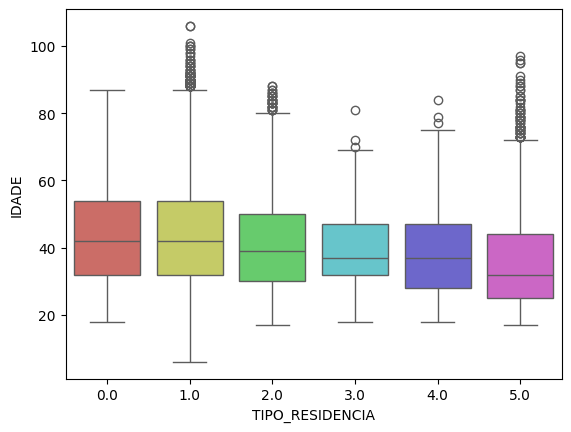

In [146]:
#Vamos agora ver como esses tipos se comportam em relacao a idade
sns.boxplot(x='TIPO_RESIDENCIA',y='IDADE',data=df_clientes_rev,palette='hls')


Analisando a distribuicao podemos verificar uma relacao da idade com om tipo do imovel, assim podemo entao distribuir os valores nulos do tipo de imovel pela faixa de idade

In [147]:
#Funcao para aplicar um valor para o tipo de residencia nula a depender da faixa de idade
def tres_approx(cols):
    Age = cols[0]
    Tres = cols[1]

    if pd.isnull(Tres):
        if Age <= 28:
            return 5
        elif Age > 28 and Age <= 30:
            return 4
        elif Age > 30 and Age <= 35:
            return 3
        elif Age > 35 and Age <= 38:
            return 2
        elif Age > 38 and Age <= 40:
            return 1
        else:
            return 0
    else:
        return Tres

In [148]:
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['TIPO_RESIDENCIA'] = df_clientes_rev[['IDADE','TIPO_RESIDENCIA']].apply(tres_approx,axis=1)

#Verificando se nao existe mais nan no tipo de residencia
df_clientes_rev.isnull().sum()

TIPO_FUNCIONARIO                        0
DIA_PAGAMENTO                           0
QUANT_CARTOES_ADICIONAIS                0
SEXO                                    0
ESTADO_CIVIL                            0
QUANT_DEPENDENTES                       0
NIVEL_EDUCACIONAL                       0
ESTADO_NASCIMENTO                       0
CIDADE_NASCIMENTO                       0
NACIONALIDADE                           0
TIPO_RESIDENCIA                         0
MESES_RESIDENCIA                     3777
FLAG_TELEFONE_MOVEL                     0
FLAG_EMAIL                              0
RENDA_PESSOAL_MENSAL                    0
OUTRAS_RENDAS                           0
FLAG_VISA                               0
FLAG_MASTERCARD                         0
FLAG_DINERS                             0
FLAG_AMERICAN_EXPRESS                   0
FLAG_OUTROS_CARTOES                     0
QUANT_CONTAS_BANCARIAS                  0
QUANT_CONTAS_BANCARIAS_ESPECIAIS        0
VALOR_PATRIMONIO_PESSOAL          

In [149]:
df_clientes_rev.TIPO_RESIDENCIA.unique()

array([1., 0., 2., 5., 3., 4.])

Vamos avaliar agora a correlacao do tempo de residencia com o tipo de residencia para tentarmos identificar uma forma de classificar os nan sem enviesar nossa base

<ipython-input-150-80d635cf3f42>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TIPO_RESIDENCIA',y='MESES_RESIDENCIA',data=df_clientes_rev,palette='hls')


<Axes: xlabel='TIPO_RESIDENCIA', ylabel='MESES_RESIDENCIA'>

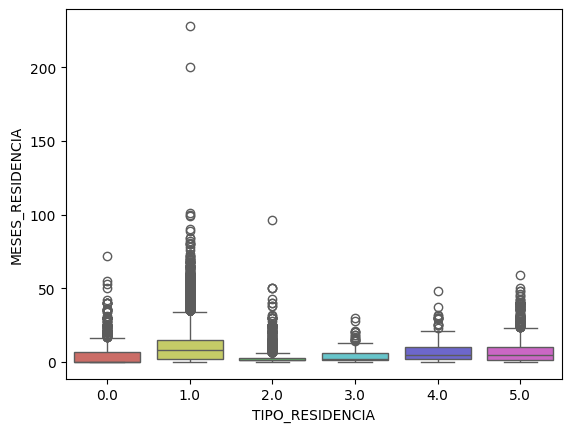

In [150]:
#Vamos agora ver como o tempo de residencia se comporta em relacao ao tipo
sns.boxplot(x='TIPO_RESIDENCIA',y='MESES_RESIDENCIA',data=df_clientes_rev,palette='hls')

Verificamos que o tempo de residencia tem alguma correlacao com o tempo de imovel entao vamos substituir os nan do tempo de residencia pela media de meses do tipo de residencia

In [151]:
#Funcao para aplicar um valor para o tipo de residencia nula a depender da faixa de idade
def mres_approx(cols):
    Mres = cols[0]
    Tres = cols[1]

    if pd.isnull(Mres):
        if Tres == 0:
            return 6
        elif Tres == 1:
            return 20
        elif Tres == 2:
            return 8
        elif Tres == 3:
            return 9
        elif Tres == 4:
            return 12
        else:
            return 15
    else:
        return Mres

In [152]:
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['MESES_RESIDENCIA'] = df_clientes_rev[['MESES_RESIDENCIA','TIPO_RESIDENCIA']].apply(mres_approx,axis=1)

#Verificando se nao existe mais nan no tempo de residencia
df_clientes_rev.isnull().sum()

TIPO_FUNCIONARIO                        0
DIA_PAGAMENTO                           0
QUANT_CARTOES_ADICIONAIS                0
SEXO                                    0
ESTADO_CIVIL                            0
QUANT_DEPENDENTES                       0
NIVEL_EDUCACIONAL                       0
ESTADO_NASCIMENTO                       0
CIDADE_NASCIMENTO                       0
NACIONALIDADE                           0
TIPO_RESIDENCIA                         0
MESES_RESIDENCIA                        0
FLAG_TELEFONE_MOVEL                     0
FLAG_EMAIL                              0
RENDA_PESSOAL_MENSAL                    0
OUTRAS_RENDAS                           0
FLAG_VISA                               0
FLAG_MASTERCARD                         0
FLAG_DINERS                             0
FLAG_AMERICAN_EXPRESS                   0
FLAG_OUTROS_CARTOES                     0
QUANT_CONTAS_BANCARIAS                  0
QUANT_CONTAS_BANCARIAS_ESPECIAIS        0
VALOR_PATRIMONIO_PESSOAL          

In [153]:
df_clientes_rev.MESES_RESIDENCIA.unique()

array([ 15.,   1.,  20.,   6.,  12.,   4.,   0.,   5.,  10.,   2.,   3.,
        18.,  25.,  14.,  16.,   8.,   7.,   9.,  17.,  30.,  11.,  37.,
        22.,  33.,  26.,  40.,  32.,  29.,  23.,  13.,  36.,  45.,  60.,
        34.,  21.,  31.,  35.,  38.,  39.,  24.,  19.,  48.,  28.,  52.,
        49.,  46.,  27.,  42.,  62.,  51.,  82.,  44.,  68.,  71.,  50.,
        47.,  41.,  57.,  69.,  55., 200.,  53., 100.,  72.,  43.,  70.,
        54.,  56.,  80.,  65.,  90.,  58.,  96.,  64.,  76.,  84.,  73.,
        59., 228.,  63., 101.,  99.,  66.,  67.,  78.,  61.,  81.,  89.])

Agora para os campos
> CODIGO_PROFISSAO

> TIPO_OCUPACAO

> CODIGO_PROFISSAO_CONJUGE

> NIVEL_EDUCACIONAL_CONJUGE

Nao foram identificados relevancia para o modelo vamos apenas removelos

In [154]:
#Removendo as features que nao sao relevantes para o modelo
df_clientes_rev = df_clientes_rev
df_clientes_rev = df_clientes_rev.drop(['CODIGO_PROFISSAO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_OCUPACAO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_PROFISSAO_CONJUGE'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['NIVEL_EDUCACIONAL_CONJUGE'],axis=1)
df_clientes_rev.head()

,TIPO_FUNCIONARIO,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,...,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,ROTULO_ALVO_MAU=1
0,C,5,0,F,6,1,0,RN,Assu,1,...,0,0,0,0,0,0,1,N,32,1
1,C,15,0,F,2,0,0,RJ,rio de janeiro,1,...,0,0,0,0,0,0,1,N,34,1
2,C,5,0,F,2,0,0,RN,GARANHUNS,1,...,0,0,0,0,0,0,1,N,27,0
3,C,20,0,F,2,0,0,PE,CABO,1,...,0,0,0,0,0,0,1,N,61,0
4,C,10,0,M,2,0,0,RJ,RIO DE JANEIRO,1,...,0,0,0,0,0,0,1,N,48,1


In [155]:
#Verificando se nao existe mais nan na base
df_clientes_rev.isnull().sum()

TIPO_FUNCIONARIO                    0
DIA_PAGAMENTO                       0
QUANT_CARTOES_ADICIONAIS            0
SEXO                                0
ESTADO_CIVIL                        0
QUANT_DEPENDENTES                   0
NIVEL_EDUCACIONAL                   0
ESTADO_NASCIMENTO                   0
CIDADE_NASCIMENTO                   0
NACIONALIDADE                       0
TIPO_RESIDENCIA                     0
MESES_RESIDENCIA                    0
FLAG_TELEFONE_MOVEL                 0
FLAG_EMAIL                          0
RENDA_PESSOAL_MENSAL                0
OUTRAS_RENDAS                       0
FLAG_VISA                           0
FLAG_MASTERCARD                     0
FLAG_DINERS                         0
FLAG_AMERICAN_EXPRESS               0
FLAG_OUTROS_CARTOES                 0
QUANT_CONTAS_BANCARIAS              0
QUANT_CONTAS_BANCARIAS_ESPECIAIS    0
VALOR_PATRIMONIO_PESSOAL            0
QUANT_CARROS                        0
MESES_NO_TRABALHO                   0
FLAG_DOCUMEN

In [156]:
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TIPO_FUNCIONARIO                  50000 non-null  object 
 1   DIA_PAGAMENTO                     50000 non-null  int64  
 2   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 3   SEXO                              50000 non-null  object 
 4   ESTADO_CIVIL                      50000 non-null  int64  
 5   QUANT_DEPENDENTES                 50000 non-null  int64  
 6   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 7   ESTADO_NASCIMENTO                 50000 non-null  object 
 8   CIDADE_NASCIMENTO                 50000 non-null  object 
 9   NACIONALIDADE                     50000 non-null  int64  
 10  TIPO_RESIDENCIA                   50000 non-null  float64
 11  MESES_RESIDENCIA                  50000 non-null  float64
 12  FLAG

Agora iremos converter as variaveis categoricas com one-hot-enconding com a funcao get_dummies

In [157]:
tpfunc = pd.get_dummies(df_clientes_rev.TIPO_FUNCIONARIO,drop_first=False)
tpfunc.head()

,C
0,1
1,1
2,1
3,1
4,1


In [158]:
sex = pd.get_dummies(df_clientes_rev.SEXO,drop_first=True)
sex.head()

,F,M,N
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [159]:
estado = pd.get_dummies(df_clientes_rev.ESTADO_NASCIMENTO,drop_first=True)
estado.head()

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,XX
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [160]:
cidade = pd.get_dummies(df_clientes_rev.CIDADE_NASCIMENTO,drop_first=True)
cidade.head()

,1051970,13051961,19091978,22011945,22071971,22082002,29081953,30011974,4PATROCINIO,4PELOTAS,...,xxxxxxx,xxxxxxxx,xxxxxxxx xxxxxxxxxx,xxxxxxxxx,xxxxxxxxxx,xxxxxxxxxxx,xxxxxxxxxxxx,xxxxxxxxxxxxxxx,xzx,zx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
flagtelmovel = pd.get_dummies(df_clientes_rev.FLAG_TELEFONE_MOVEL,drop_first=False)
flagtelmovel.head()

,N
0,1
1,1
2,1
3,1
4,1


In [162]:
flagregacsp = pd.get_dummies(df_clientes_rev.FLAG_REGISTRO_ACSP,drop_first=False)
flagregacsp.head()

,N
0,1
1,1
2,1
3,1
4,1


In [163]:
#Agora vamos remover as colunas originais
df_clientes_rev = df_clientes_rev.drop(['TIPO_FUNCIONARIO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['SEXO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_NASCIMENTO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_NASCIMENTO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_MOVEL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_REGISTRO_ACSP'],axis=1)

In [164]:
#Agora vamos concatenar as dummies
df_clientes_rev_dmy = pd.concat([tpfunc,sex,estado,cidade,flagtelmovel,flagregacsp,df_clientes_rev],axis = 1)
df_clientes_rev_dmy.head()

,C,F,M,N,AC,AL,AM,AP,BA,CE,...,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ROTULO_ALVO_MAU=1
0,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,32,1
1,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,34,1
2,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,27,0
3,1,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,61,0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,1,48,1


In [165]:
df_clientes_rev_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 9971 entries, C to ROTULO_ALVO_MAU=1
dtypes: float64(5), int64(23), uint8(9943)
memory usage: 484.8 MB


Agora que nao temos mais valores nan na nossa base, iremos executar o modelo knn sem demais tratamentos, e teremos uma base avaliarmos nosso modelo na sequencia iremos aplicar tecnicas de feature engenier para melhorar a acertividade do nosso modelo.

In [166]:
#Vamos separar nossa base tratada em treino e teste
X = df_clientes_rev_dmy.iloc[:, :-1]
y = df_clientes_rev_dmy.iloc[:, -1]

In [167]:
X

,C,F,M,N,AC,AL,AM,AP,BA,CE,...,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE
0,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,32
1,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,34
2,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,27
3,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,61
4,1,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,0,0,0,0,0,0,0,0,...,1,0.0,1,0,0,0,0,0,1,36
49996,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,2,21
49997,1,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,41
49998,1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,1,28


In [2]:
y

NameError: name 'y' is not defined

In [169]:
#Agora vamos dividir em treino e teste (teste com 30%)
X_train,X_teste,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 25)

In [171]:
#Vamos criar o modelo knn
Classif_KNN = KNeighborsClassifier(n_neighbors=1)

In [1]:
#Vamos realizar o treinamento do modelo
Classif_KNN.fit(X_train, y_train)

NameError: name 'Classif_KNN' is not defined

In [88]:
#Vamos predizer com nossa base de teste utilizando o modelo treinado
y_pred = Classif_KNN.predict(X_teste)

In [89]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [90]:
y_test

13920    0
23439    0
11851    1
8278     1
31258    1
        ..
31994    0
4715     0
38700    1
49995    1
24859    1
Name: ROTULO_ALVO_MAU=1, Length: 15000, dtype: int64

Agora podemos realizar nossa avaliacao do modelo

In [91]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82     11079
           1       0.34      0.15      0.21      3921

    accuracy                           0.70     15000
   macro avg       0.54      0.52      0.51     15000
weighted avg       0.64      0.70      0.66     15000

0.7021333333333334


Nosso modelo alcancou uma acuracia total de 70% na sequencia iremos mostrar a matriz de confusao

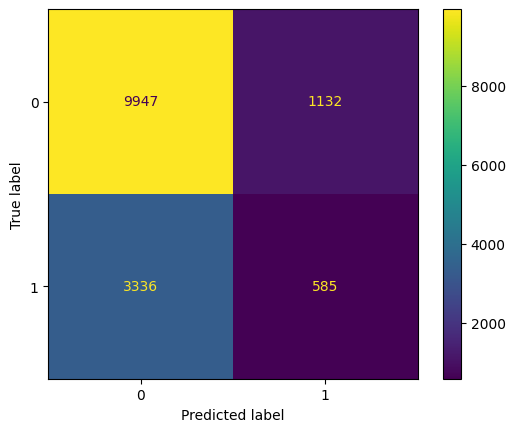

In [92]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

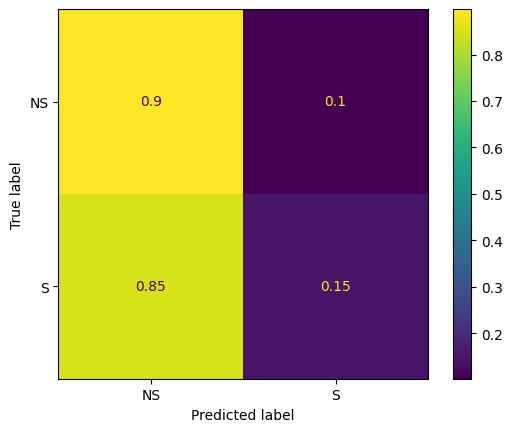

In [93]:
labels = [0,1]
label_names = ['NS', 'S']
cm = confusion_matrix( y_test, y_pred, labels = labels, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels = label_names)
disp.plot()

Entao agora que temos uma analise incial do nosso modelo iremos aplicar as tecnicas de feature engenier para melhorar nosso modelo

In [94]:
#Vamos voltar a nossa base inicial e reinicar a analisa das colunas que devem ser removidas para que nosso modelo nao sofra da maldicao da dimensionalidade
df_clientes_rev = df_clientes
df_clientes_rev.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [95]:
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

In [115]:
#Removendo as features que nao sao relevantes para o modelo
df_clientes_rev = df_clientes
df_clientes_rev = df_clientes_rev.drop(['ID_CLIENTE'],axis=1) #ID Sequencial nao e interessante ao modelo
df_clientes_rev = df_clientes_rev.drop(['TIPO_FUNCIONARIO'],axis=1) #Todos os registros tem o mesmo valor C nao e interessante ao modelo
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENVIO_APLICACAO'],axis=1) #Nao a descricao para essa variavel e nao e interessante ao modelo
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENDERECO_POSTAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['ESTADO_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CIDADE_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_RESIDENCIAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['ESTADO_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CIDADE_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_PROFISSIONAL'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CEP_RESIDENCIAL_3'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['CEP_PROFISSIONAL_3'],axis=1) #Vou considerar qualquer informarcao sobre a localizacao do cliente inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['EMPRESA'],axis=1) #Nome da empresa nao e um item classificavel para avaliar se o cliente pode se tornar inadimplente estou desconsiderando para o modelo
df_clientes_rev = df_clientes_rev.drop(['CODIGO_PROFISSAO_CONJUGE'],axis=1) #Informacoes do conjuge tambem consideramos inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['NIVEL_EDUCACIONAL_CONJUGE'],axis=1)  #Informacoes do conjuge tambem consideramos inutil para o modelo
df_clientes_rev = df_clientes_rev.drop(['ESTADO_NASCIMENTO'],axis=1)  #Informacoes de localizacao nao agragam ao nosso modelo vamos desconsideralas
df_clientes_rev = df_clientes_rev.drop(['CIDADE_NASCIMENTO'],axis=1)  #Informacoes de localizacao nao agragam ao nosso modelo vamos desconsideralas
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_MOVEL'],axis=1)  #Contem apenas uma informacao entao vamos remover

In [116]:
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['MESES_RESIDENCIA'] = df_clientes_rev[['MESES_RESIDENCIA','TIPO_RESIDENCIA']].apply(mres_approx,axis=1)
#Vamos aplicar a funcao na nossa base revisada
df_clientes_rev['TIPO_RESIDENCIA'] = df_clientes_rev[['IDADE','TIPO_RESIDENCIA']].apply(tres_approx,axis=1)


In [117]:
#Vamos verificar os tipos e os nulos novamente
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DIA_PAGAMENTO                     50000 non-null  int64  
 1   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 2   SEXO                              50000 non-null  object 
 3   ESTADO_CIVIL                      50000 non-null  int64  
 4   QUANT_DEPENDENTES                 50000 non-null  int64  
 5   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 6   NACIONALIDADE                     50000 non-null  int64  
 7   TIPO_RESIDENCIA                   50000 non-null  float64
 8   MESES_RESIDENCIA                  50000 non-null  float64
 9   FLAG_EMAIL                        50000 non-null  int64  
 10  RENDA_PESSOAL_MENSAL              50000 non-null  float64
 11  OUTRAS_RENDAS                     50000 non-null  float64
 12  FLAG

In [118]:
#Vamos analisar a coluna codigo da profissao
df_clientes_rev.CODIGO_PROFISSAO.unique()

array([ 9., 11., nan,  0.,  2., 13.,  7., 12.,  6., 16.,  8., 10., 15.,
       17.,  3.,  4.,  5., 18., 14.,  1.])

In [119]:
#Vamos analisar a coluna codigo da profissao
df_clientes_rev.TIPO_OCUPACAO.unique()

array([ 4., nan,  5.,  2.,  1.,  0.,  3.])

In [120]:
#Acredito que os nulos no codigo da profissao seja alguma profissao nao catalogada ou o cliente nao informou entao criarei um codigo ficticio para elas
df_clientes_rev.CODIGO_PROFISSAO = df_clientes_rev.CODIGO_PROFISSAO.fillna(99)
df_clientes_rev.CODIGO_PROFISSAO.unique()

array([ 9., 11., 99.,  0.,  2., 13.,  7., 12.,  6., 16.,  8., 10., 15.,
       17.,  3.,  4.,  5., 18., 14.,  1.])

Acredito que a ocupacao seja relevante para o modelo vamos tambem completar com um codigo ficticio para os itens nao informados

In [121]:
df_clientes_rev.TIPO_OCUPACAO = df_clientes_rev.TIPO_OCUPACAO.fillna(99)
df_clientes_rev.TIPO_OCUPACAO.unique()

array([ 4., 99.,  5.,  2.,  1.,  0.,  3.])

In [122]:
#Vamos verificar os tipos e os nulos novamente
df_clientes_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DIA_PAGAMENTO                     50000 non-null  int64  
 1   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 2   SEXO                              50000 non-null  object 
 3   ESTADO_CIVIL                      50000 non-null  int64  
 4   QUANT_DEPENDENTES                 50000 non-null  int64  
 5   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 6   NACIONALIDADE                     50000 non-null  int64  
 7   TIPO_RESIDENCIA                   50000 non-null  float64
 8   MESES_RESIDENCIA                  50000 non-null  float64
 9   FLAG_EMAIL                        50000 non-null  int64  
 10  RENDA_PESSOAL_MENSAL              50000 non-null  float64
 11  OUTRAS_RENDAS                     50000 non-null  float64
 12  FLAG

Vamos dumieficar as variaveis object da nossa base

In [123]:
sex = pd.get_dummies(df_clientes_rev.SEXO,drop_first=True)
flagregacsp = pd.get_dummies(df_clientes_rev.FLAG_REGISTRO_ACSP,drop_first=False)

In [124]:
#Agora vamos remover as colunas originais
df_clientes_rev = df_clientes_rev.drop(['SEXO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_REGISTRO_ACSP'],axis=1)

In [127]:
#Agora vamos concatenar as dummies
df_clientes_rev_dmy = pd.concat([sex,flagregacsp,df_clientes_rev],axis = 1)
df_clientes_rev_dmy.head()

,F,M,N,N,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,...,MESES_NO_TRABALHO,CODIGO_PROFISSAO,TIPO_OCUPACAO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ROTULO_ALVO_MAU=1
0,1,0,0,1,5,0,6,1,0,1,...,0,9.0,4.0,0,0,0,0,1,32,1
1,1,0,0,1,15,0,2,0,0,1,...,0,11.0,4.0,0,0,0,0,1,34,1
2,1,0,0,1,5,0,2,0,0,1,...,0,11.0,99.0,0,0,0,0,1,27,0
3,1,0,0,1,20,0,2,0,0,1,...,0,99.0,99.0,0,0,0,0,1,61,0
4,0,1,0,1,10,0,2,0,0,1,...,0,9.0,5.0,0,0,0,0,1,48,1


In [128]:
df_clientes_rev_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   F                                 50000 non-null  uint8  
 1   M                                 50000 non-null  uint8  
 2   N                                 50000 non-null  uint8  
 3   N                                 50000 non-null  uint8  
 4   DIA_PAGAMENTO                     50000 non-null  int64  
 5   QUANT_CARTOES_ADICIONAIS          50000 non-null  int64  
 6   ESTADO_CIVIL                      50000 non-null  int64  
 7   QUANT_DEPENDENTES                 50000 non-null  int64  
 8   NIVEL_EDUCACIONAL                 50000 non-null  int64  
 9   NACIONALIDADE                     50000 non-null  int64  
 10  TIPO_RESIDENCIA                   50000 non-null  float64
 11  MESES_RESIDENCIA                  50000 non-null  float64
 12  FLAG

Agora apos o novo tratamento vamos rodar o modelo KNN novamente para verificar a precisao

In [129]:
#Vamos separar nossa base tratada em treino e teste
X = df_clientes_rev_dmy.iloc[:, :-1]
y = df_clientes_rev_dmy.iloc[:, -1]